<a href="https://colab.research.google.com/github/glatham1/ECGR_4105_MachineLearning/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

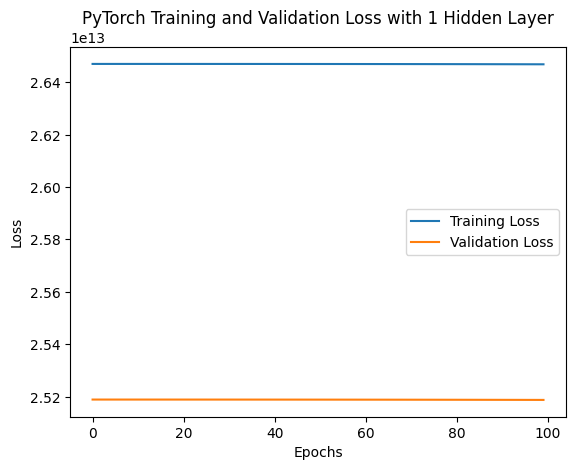

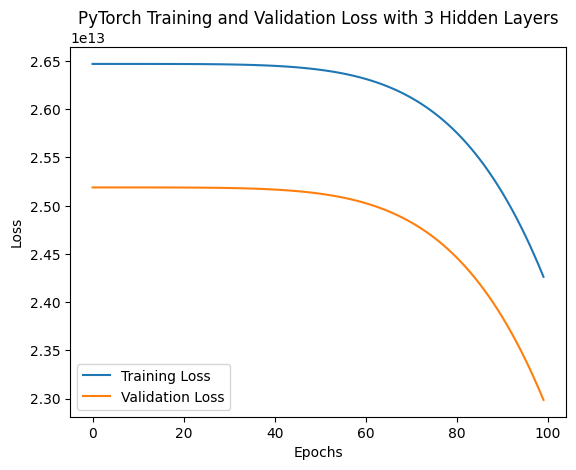

In [12]:
# Problem 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
housing = pd.read_csv('Housing.csv')

# Preprocess the data
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

# Selecting features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features].values
y = housing['price'].values

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_scaled.astype(np.float32))
y_val_tensor = torch.tensor(y_val.astype(np.float32)).unsqueeze(1)

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(len(features), 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass and loss calculation
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor)
    val_losses.append(val_loss.item())

# Plot the training and validation loss
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training and Validation Loss with 1 Hidden Layer')
plt.legend()
plt.show()

# Define a more complex neural network
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(len(features), 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model_extended = ComplexNet()

# Reuse the same optimizer and criterion
optimizer = optim.Adam(model_extended.parameters(), lr=0.001)

# Training loop for the extended model
epochs = 100
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass and loss calculation
    y_pred = model_extended(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    train_losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    with torch.no_grad():
        y_val_pred = model_extended(X_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor)
    val_losses.append(val_loss.item())

# Plot the training and validation loss for the extended model
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training and Validation Loss with 3 Hidden Layers')
plt.legend()
plt.show()


In [ ]:
# Problem 2

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# CIFAR-10 data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define a Neural Network with One Hidden Layer
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
print('Finished Training')
print(f"Training time: {end_time - start_time:.2f} seconds")

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Define an Extended Neural Network
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

extended_net = ExtendedNet()

# Define Loss function and optimizer for the extended network
optimizer_extended = optim.SGD(extended_net.parameters(), lr=0.001, momentum=0.9)

# Train the extended network
start_time = time.time()
for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer_extended.zero_grad()

        outputs = extended_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_extended.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
print('Finished Training Extended Network')
print(f"Extended Network Training time: {end_time - start_time:.2f} seconds")

# Test the extended network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = extended_net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the extended network on the 10000 test images: {100 * correct / total:.2f}%')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.829
[1,  4000] loss: 1.677
[1,  6000] loss: 1.627
[1,  8000] loss: 1.609
[1, 10000] loss: 1.575
[1, 12000] loss: 1.574
[2,  2000] loss: 1.493
[2,  4000] loss: 1.511
[2,  6000] loss: 1.495
[2,  8000] loss: 1.467
[2, 10000] loss: 1.454
[2, 12000] loss: 1.448
Finished Training
Training time: 303.06 seconds
Accuracy of the network on the 10000 test images: 46.94%
[1,  2000] loss: 2.025
[1,  4000] loss: 1.767
[1,  6000] loss: 1.678
[1,  8000] loss: 1.625
[1, 10000] loss: 1.575
[1, 12000] loss: 1.568
[2,  2000] loss: 1.464
[2,  4000] loss: 1.467
[2,  6000] loss: 1.451
[2,  8000] loss: 1.439
[2, 10000] loss: 1.424
[2, 12000] loss: 1.403
[3,  2000] loss: 1.324
[3,  4000] loss: 1.326
[3,  6000] loss: 1.331
[3,  8000] loss: 1.297
[3, 10000] loss: 1.305
[3, 12000] loss: 1.309
[4,  2000] loss: 1.204
[4,  4000] loss: 1.227
[4,  6000] loss: 1.238
[4,  8000] loss: 1.215
[4, 10000] loss: 1.234
[4, 12000] los